# Install Libraries

In [1]:
!pip3 install pyroomacoustics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for Cython from https://files.pythonhosted.org/packages/f0/4d/f3c3b288759326e8db794ec8f300e23f05da6bfd967aa5c52ace95cfc899/Cython-3.0.5-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached Cython-3.0.5-cp311-cp311-macosx_10_9_x86_64.whl.metadata (3.2 kB)
  Obtaining dependency information for pybind11>=2.2 from https://files.pythonhosted.org/packages/06/55/9f73c32dda93fa4f539fafa268f9504e83c489f460c380371d94296126cd/pybind11-2.11.1-py3-none-any.whl.metadata
  Using cached pybind11-2.11.1-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
Using cached Cython-3.0.5-cp311-cp311-macosx_10_9_x86_64.whl (3.1 MB)
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.7.3-cp311-cp311-mac

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import scipy.io.wavfile as wav
from IPython.display import Audio
import pyroomacoustics as pra

# Lil noise simulation... Doesn't really look like headphones yet lol

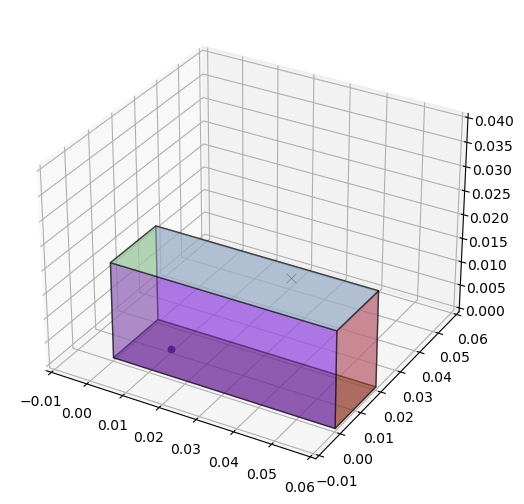

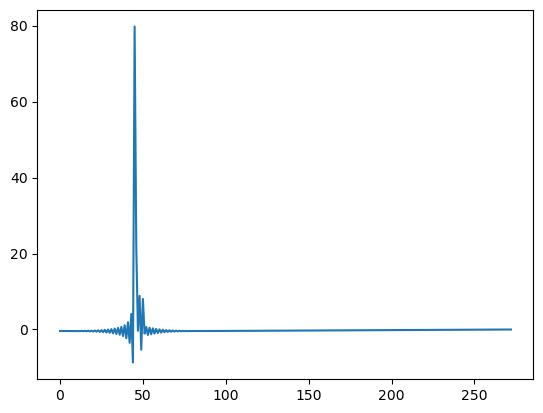

In [3]:
x = np.random.randn(999999)
fs = 48e3
m = pra.make_materials(ceiling=0.3,
                       floor=0.3,
                       east=0.8,
                       west=0.8,
                       north=0.8,
                       south=0.8,)

room_dim = [0.06, 0.02, 0.02]
room = pra.ShoeBox(room_dim, fs=fs, materials=m, air_absorption=True, ray_tracing=True)

#set_raytracing
room.add_source([0.01, 0.01, 1e-4], signal=x)
mic = np.array([0.04, 0.015, 0.02-1e-4])
room.add_microphone(mic)
fig, ax = room.plot(mic_marker_size=50)
ax.set_xlim([-0.01, 0.01 + 0.05])
ax.set_ylim([-0.01, 0.01 + 0.05])
ax.set_zlim([0, 0.04])
plt.show()

room.image_source_model()

room.compute_rir()
plt.plot(room.rir[0][0])

response = room.rir[0][0]

# Create a Simple ANC Filter Class

In [4]:
class ANCFilter:
    def __init__(self, coefficients):
        # Coefficients is a list of weights for the filter
        self.coefficients = coefficients
        self.filterLength = len(self.coefficients)

    # Apply filter to the given noise signal
    def apply(self, noise):
        return signal.convolve(input, self.coefs, mode="full")